In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Data initalization
accidentdf = pd.read_csv('accidents_2005_to_2007.csv')

/var/folders/n_/1hzw47553v1bvg9z8kct6rd40000gn/T/ipykernel_63759/3194674404.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  accidentdf = pd.read_csv('accidents_2005_to_2007.csv')


In [13]:
accidentdf.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [14]:
accidentdf['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [15]:
accidentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               570011 non-null  object 
 1   Location_Easting_OSGR                        569910 non-null  float64
 2   Location_Northing_OSGR                       569910 non-null  float64
 3   Longitude                                    569910 non-null  float64
 4   Latitude                                     569910 non-null  float64
 5   Police_Force                                 570011 non-null  int64  
 6   Accident_Severity                            570011 non-null  int64  
 7   Number_of_Vehicles                           570011 non-null  int64  
 8   Number_of_Casualties                         570011 non-null  int64  
 9   Date                                         570011 non-nul

In [16]:
# Exploration of data
df = accidentdf.drop(columns = ['Accident_Index','Location_Easting_OSGR',
                            'Location_Northing_OSGR','Date','LSOA_of_Accident_Location',
                            'Local_Authority_(District)','Local_Authority_(Highway)',
                            '1st_Road_Number','Longitude','Latitude',
                            '1st_Road_Class', 'Road_Type',
                            'Police_Force','Junction_Detail',
                            '2nd_Road_Class','2nd_Road_Number'
                            ])



In [17]:
df['Time'] = df['Time'].str.split(':').str[0]



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            570011 non-null  int64 
 1   Number_of_Vehicles                           570011 non-null  int64 
 2   Number_of_Casualties                         570011 non-null  int64 
 3   Day_of_Week                                  570011 non-null  int64 
 4   Time                                         569944 non-null  object
 5   Speed_limit                                  570011 non-null  int64 
 6   Junction_Control                             333066 non-null  object
 7   Pedestrian_Crossing-Human_Control            569994 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      569977 non-null  object
 9   Light_Conditions                             570011 non-null  object
 

In [19]:
df

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,2,1,1,3,17,30,NaN,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,2005
1,3,1,1,4,17,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,2005
2,3,2,1,5,00,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,2005
3,3,1,1,6,10,30,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,2005
4,3,1,1,2,21,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570006,3,1,1,5,22,60,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Frost/Ice,NaN,NaN,2,Yes,2007
570007,2,1,2,6,13,40,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,NaN,NaN,2,Yes,2007
570008,3,1,1,1,03,60,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fog or mist,Frost/Ice,NaN,NaN,2,Yes,2007
570009,3,1,1,1,20,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,NaN,NaN,2,No,2007


In [20]:
df['Junction_Control'].unique()

array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

In [21]:
df['Junction_Control'].isna().mean()

np.float64(0.4156849604656752)

In [22]:
# Processing Speed Limit by binning
bins = [0, 30, 50, 70]
labels = ['Low', 'Medium', 'High']
df['Speed_limit'] = pd.cut(
    df['Speed_limit'],
    bins=bins,
    labels=labels,
    include_lowest=True
).cat.codes.replace(-1, np.nan)

In [23]:
#df

In [24]:
df['Junction_Control'].unique()

array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

In [25]:
df['Junction_Control'] = df['Junction_Control'].fillna('No junction')
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].fillna('No Hazards')
df['Special_Conditions_at_Site'] = df['Special_Conditions_at_Site'].fillna('No special Conditions')

In [26]:
#df

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            570011 non-null  int64 
 1   Number_of_Vehicles                           570011 non-null  int64 
 2   Number_of_Casualties                         570011 non-null  int64 
 3   Day_of_Week                                  570011 non-null  int64 
 4   Time                                         569944 non-null  object
 5   Speed_limit                                  570011 non-null  int8  
 6   Junction_Control                             570011 non-null  object
 7   Pedestrian_Crossing-Human_Control            569994 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      569977 non-null  object
 9   Light_Conditions                             570011 non-null  object
 

In [28]:
df['Pedestrian_Crossing-Human_Control'].isna().sum()


np.int64(17)

In [29]:
df = df.dropna(subset=['Pedestrian_Crossing-Human_Control'])


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569994 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            569994 non-null  int64 
 1   Number_of_Vehicles                           569994 non-null  int64 
 2   Number_of_Casualties                         569994 non-null  int64 
 3   Day_of_Week                                  569994 non-null  int64 
 4   Time                                         569928 non-null  object
 5   Speed_limit                                  569994 non-null  int8  
 6   Junction_Control                             569994 non-null  object
 7   Pedestrian_Crossing-Human_Control            569994 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      569967 non-null  object
 9   Light_Conditions                             569994 non-null  object
 10  W

In [31]:
#df

In [32]:
df['Pedestrian_Crossing-Physical_Facilities'].isna().sum()

np.int64(27)

In [33]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['Zebra crossing', 'Pedestrian phase at traffic signal junction',
       'No physical crossing within 50 meters', 'Central refuge',
       'non-junction pedestrian crossing', 'Footbridge or subway', nan],
      dtype=object)

In [34]:
df = df.dropna(subset=['Pedestrian_Crossing-Physical_Facilities'])


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569967 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            569967 non-null  int64 
 1   Number_of_Vehicles                           569967 non-null  int64 
 2   Number_of_Casualties                         569967 non-null  int64 
 3   Day_of_Week                                  569967 non-null  int64 
 4   Time                                         569901 non-null  object
 5   Speed_limit                                  569967 non-null  int8  
 6   Junction_Control                             569967 non-null  object
 7   Pedestrian_Crossing-Human_Control            569967 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      569967 non-null  object
 9   Light_Conditions                             569967 non-null  object
 10  W

In [36]:
df['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [37]:
#Fixing Ty[p]
df['Light_Conditions'] = df['Light_Conditions'].replace(
    {'Darkeness: No street lighting': 'Darkness: No street lighting'}
)


In [38]:
df['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkness: No street lighting'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569967 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            569967 non-null  int64 
 1   Number_of_Vehicles                           569967 non-null  int64 
 2   Number_of_Casualties                         569967 non-null  int64 
 3   Day_of_Week                                  569967 non-null  int64 
 4   Time                                         569901 non-null  object
 5   Speed_limit                                  569967 non-null  int8  
 6   Junction_Control                             569967 non-null  object
 7   Pedestrian_Crossing-Human_Control            569967 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      569967 non-null  object
 9   Light_Conditions                             569967 non-null  object
 10  W

In [40]:
df['Weather_Conditions'].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds', nan], dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569967 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            569967 non-null  int64 
 1   Number_of_Vehicles                           569967 non-null  int64 
 2   Number_of_Casualties                         569967 non-null  int64 
 3   Day_of_Week                                  569967 non-null  int64 
 4   Time                                         569901 non-null  object
 5   Speed_limit                                  569967 non-null  int8  
 6   Junction_Control                             569967 non-null  object
 7   Pedestrian_Crossing-Human_Control            569967 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      569967 non-null  object
 9   Light_Conditions                             569967 non-null  object
 10  W

In [42]:
df['Time'].isna().sum()

np.int64(66)

In [43]:
df = df.dropna(subset=['Time'])

In [44]:
df['Weather_Conditions'].isna().sum()

np.int64(20)

In [45]:
df = df.dropna(subset=['Weather_Conditions'])

In [46]:
df['Road_Surface_Conditions'].isna().sum()

np.int64(652)

In [47]:
df['Road_Surface_Conditions'].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', nan], dtype=object)

In [48]:
df = df.dropna(subset=['Road_Surface_Conditions'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569229 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            569229 non-null  int64 
 1   Number_of_Vehicles                           569229 non-null  int64 
 2   Number_of_Casualties                         569229 non-null  int64 
 3   Day_of_Week                                  569229 non-null  int64 
 4   Time                                         569229 non-null  object
 5   Speed_limit                                  569229 non-null  int8  
 6   Junction_Control                             569229 non-null  object
 7   Pedestrian_Crossing-Human_Control            569229 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      569229 non-null  object
 9   Light_Conditions                             569229 non-null  object
 10  W

In [50]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No', nan], dtype=object)

In [51]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].isna().sum()

np.int64(1972)

In [52]:
df = df.dropna(subset=['Did_Police_Officer_Attend_Scene_of_Accident'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567257 entries, 0 to 570010
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Severity                            567257 non-null  int64 
 1   Number_of_Vehicles                           567257 non-null  int64 
 2   Number_of_Casualties                         567257 non-null  int64 
 3   Day_of_Week                                  567257 non-null  int64 
 4   Time                                         567257 non-null  object
 5   Speed_limit                                  567257 non-null  int8  
 6   Junction_Control                             567257 non-null  object
 7   Pedestrian_Crossing-Human_Control            567257 non-null  object
 8   Pedestrian_Crossing-Physical_Facilities      567257 non-null  object
 9   Light_Conditions                             567257 non-null  object
 10  W

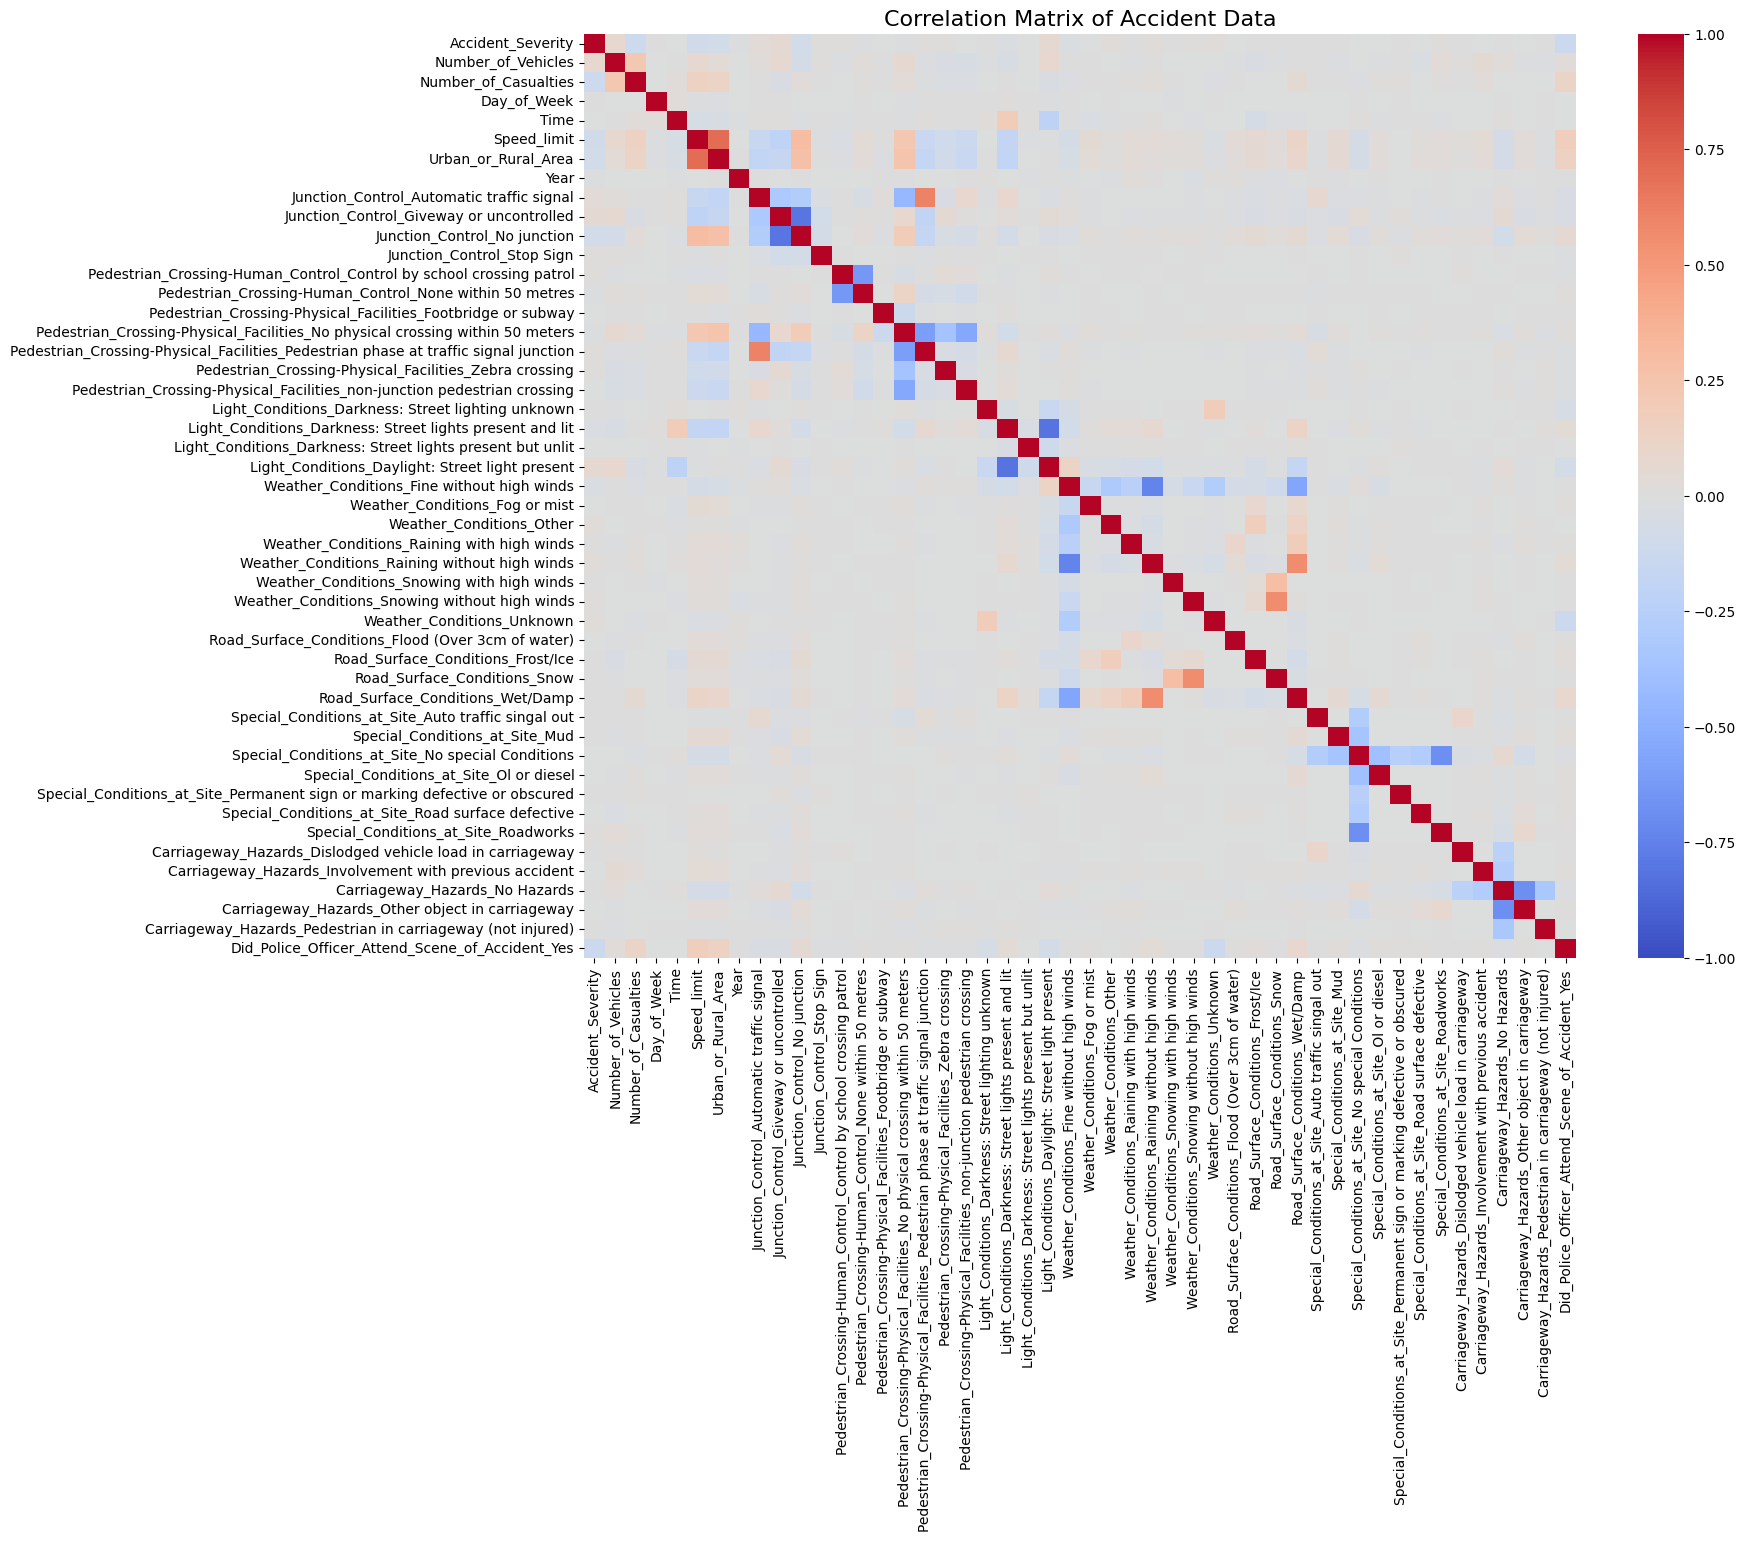

In [54]:
# Data Representation
import pandas as pd

# One-hot encode categorical columns
categorical_cols = [
    'Junction_Control',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
corr_matrix = df_encoded.corr()



plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, cbar=True, vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Accident Data", fontsize=16)
plt.show()


<Axes: >

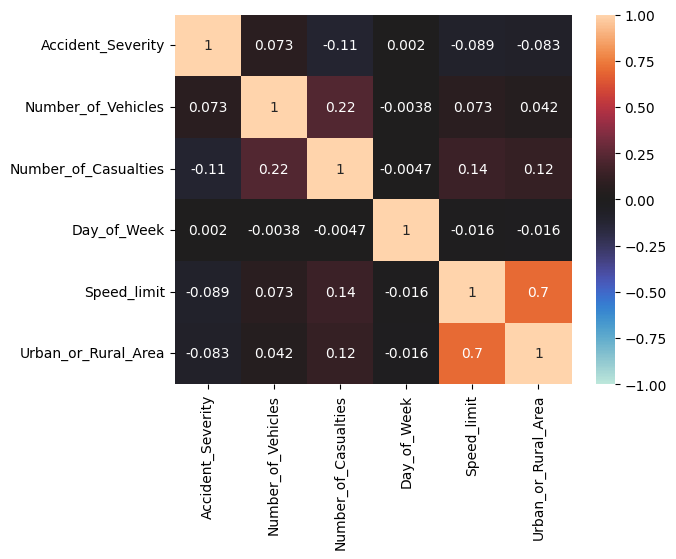

In [55]:


# Data Representation of our numeric values
sns.heatmap(df[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Speed_limit','Urban_or_Rural_Area']].corr(), annot = True, vmin = -1, vmax = 1, center = 0)

<Axes: xlabel='Accident_Severity', ylabel='count'>

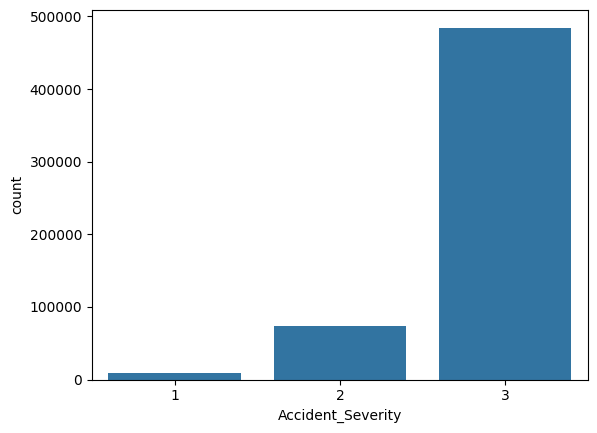

In [56]:
sns.countplot(x="Accident_Severity", data=df)

<Axes: xlabel='Number_of_Vehicles', ylabel='Number_of_Casualties'>

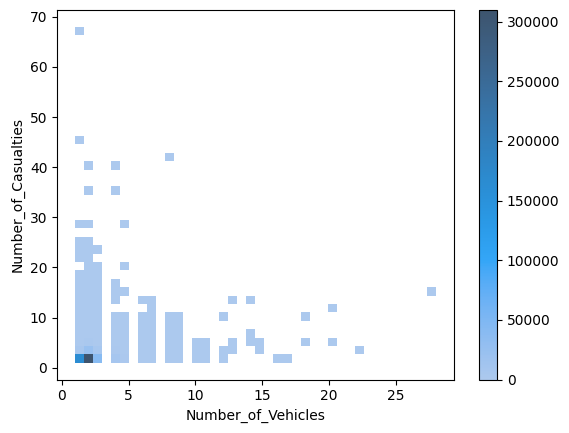

In [57]:
sns.histplot(data=df,x="Number_of_Vehicles", y="Number_of_Casualties",bins=40,cbar=True)

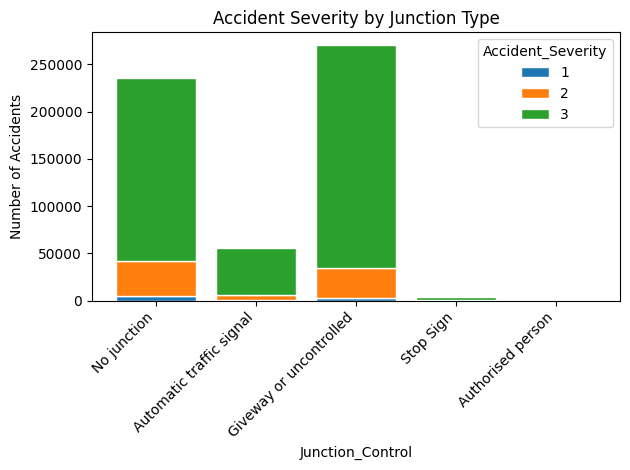

In [58]:
junctions = list(df['Junction_Control'].unique())
severities = sorted(list(df['Accident_Severity'].unique()))

x = np.arange(len(junctions))
bottom = np.zeros(len(junctions))
for i in severities:
    counts = []
    for j in junctions:
        counts.append(
            df[(df['Accident_Severity'] == i) & (df['Junction_Control'] == j)].shape[0]
        )
    plt.bar(x, counts, bottom=bottom, label=i, edgecolor='white', width=0.8)
    bottom = bottom + np.array(counts)

plt.xticks(x, junctions, rotation=45, ha='right')
plt.xlabel('Junction_Control')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Junction Type')
plt.legend(title='Accident_Severity')
plt.tight_layout()
plt.show()

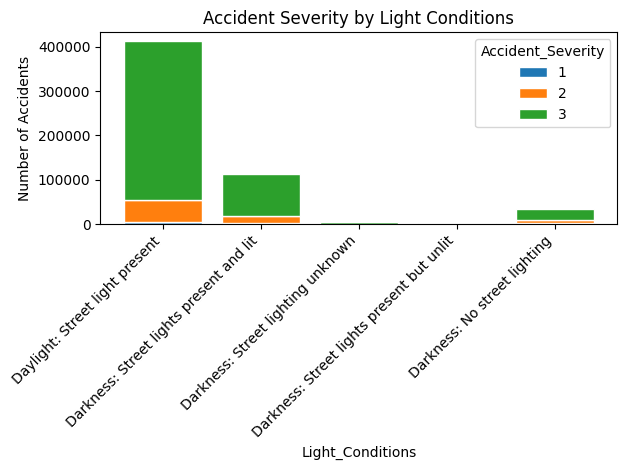

In [59]:
light = list(df['Light_Conditions'].unique())
severities = sorted(list(df['Accident_Severity'].unique()))

x = np.arange(len(junctions))
bottom = np.zeros(len(junctions))
for i in severities:
    counts = []
    for j in light:
        counts.append(
            df[(df['Accident_Severity'] == i) & (df['Light_Conditions'] == j)].shape[0]
        )
    plt.bar(x, counts, bottom=bottom, label=i, edgecolor='white', width=0.8)
    bottom = bottom + np.array(counts)

plt.xticks(x, light, rotation=45, ha='right')
plt.xlabel('Light_Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Light Conditions')
plt.legend(title='Accident_Severity')
plt.tight_layout()
plt.show()


In [60]:
df

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,2,1,1,3,17,0,No junction,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,No special Conditions,No Hazards,1,Yes,2005
1,3,1,1,4,17,0,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,No special Conditions,No Hazards,1,Yes,2005
2,3,2,1,5,00,0,No junction,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,No special Conditions,No Hazards,1,Yes,2005
3,3,1,1,6,10,0,No junction,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,No special Conditions,No Hazards,1,Yes,2005
4,3,1,1,2,21,0,No junction,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,No special Conditions,No Hazards,1,Yes,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570006,3,1,1,5,22,2,No junction,None within 50 metres,No physical crossing within 50 meters,Darkness: No street lighting,Other,Frost/Ice,No special Conditions,No Hazards,2,Yes,2007
570007,2,1,2,6,13,1,No junction,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,No special Conditions,No Hazards,2,Yes,2007
570008,3,1,1,1,03,2,No junction,None within 50 metres,No physical crossing within 50 meters,Darkness: No street lighting,Fog or mist,Frost/Ice,No special Conditions,No Hazards,2,Yes,2007
570009,3,1,1,1,20,0,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,No special Conditions,No Hazards,2,No,2007


In [61]:
junction_map = {
    'No junction': 0,
    'Giveway or uncontrolled': 0,
    'Stop Sign': 1,
    'Automatic traffic signal': 2,
    'Authorised person': 3
}

df['Junction_Control'] = df['Junction_Control'].map(junction_map)

In [63]:
df['Pedestrian_Crossing-Human_Control'].unique()
Pedestrain_map = {
    'None within 50 metres':0, 'Control by other authorised person':1,
       'Control by school crossing patrol':2
}

df['Pedestrian_Crossing-Human_Control']= df['Pedestrian_Crossing-Human_Control'].map(Pedestrain_map)

In [65]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()
Pedestrain_map = {'Zebra crossing':0, 'Pedestrian phase at traffic signal junction':1,
       'No physical crossing within 50 meters':2, 'Central refuge':3,
       'non-junction pedestrian crossing':4, 'Footbridge or subway':5}

df['Pedestrian_Crossing-Physical_Facilities']= df['Pedestrian_Crossing-Physical_Facilities'].map(Pedestrain_map)

In [67]:
df['Light_Conditions'].unique()
Light_map={'Daylight: Street light present':0,
       'Darkness: Street lights present and lit':1,
       'Darkness: Street lighting unknown':2,
       'Darkness: Street lights present but unlit':3,
       'Darkness: No street lighting':4}
df['Light_Conditions']=df['Light_Conditions'].map(Light_map)

In [69]:
df['Weather_Conditions'].unique()
weather_map={'Raining without high winds':0, 'Fine without high winds':1, 'Unknown':2,
       'Snowing without high winds':3, 'Other':4, 'Fine with high winds':5,
       'Raining with high winds':6, 'Fog or mist':7,
       'Snowing with high winds':8}
df['Weather_Conditions']=df['Weather_Conditions'].map(weather_map)

In [71]:
df['Road_Surface_Conditions'].unique()
road_map={'Wet/Damp':0, 'Dry':1, 'Frost/Ice':2, 'Snow':3,
       'Flood (Over 3cm of water)':4}
df['Road_Surface_Conditions']=df['Road_Surface_Conditions'].map(road_map)

In [73]:
df['Special_Conditions_at_Site'].unique()
conditions_map={'No special Conditions':0, 'Ol or diesel':1, 'Roadworks':2,
       'Auto traffic signal partly defective':3, 'Road surface defective':4,
       'Auto traffic singal out':5,
       'Permanent sign or marking defective or obscured':6, 'Mud':7}
df['Special_Conditions_at_Site']=df['Special_Conditions_at_Site'].map(conditions_map)

In [75]:
df['Carriageway_Hazards'].unique()
hazards={'No Hazards':0, 'Other object in carriageway':1,
       'Pedestrian in carriageway (not injured)':2,
       'Dislodged vehicle load in carriageway':3,
       'Involvement with previous accident':4,
       'Any animal (except a ridden horse)':5}
df['Carriageway_Hazards']=df['Carriageway_Hazards'].map(hazards)

In [77]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].unique()
Police={'Yes':0, 'No':1}
df['Did_Police_Officer_Attend_Scene_of_Accident']=df['Did_Police_Officer_Attend_Scene_of_Accident'].map(Police)

In [78]:
df

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,2,1,1,3,17,0,0,0,0,0,0,0,0,0,1,0,2005
1,3,1,1,4,17,0,2,0,1,1,1,1,0,0,1,0,2005
2,3,2,1,5,00,0,0,0,2,1,1,1,0,0,1,0,2005
3,3,1,1,6,10,0,0,0,2,0,1,1,0,0,1,0,2005
4,3,1,1,2,21,0,0,0,2,2,1,0,0,0,1,0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570006,3,1,1,5,22,2,0,0,2,4,4,2,0,0,2,0,2007
570007,2,1,2,6,13,1,0,0,2,0,4,2,0,0,2,0,2007
570008,3,1,1,1,03,2,0,0,2,4,7,2,0,0,2,0,2007
570009,3,1,1,1,20,0,0,0,2,1,1,0,0,0,2,1,2007
